**PENGUJIAN DENGAN DATA TURBINE BEARING**

In [ ]:
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets


In [ ]:
#mengimport dataset digunakan based classifica
predikat = pd.read_excel("Data turbine bearing TA(1).xlsx")
predikat

In [ ]:
#membagi column yang digunakan sebagai feature=x(Genshaftx,TEMPBEARING METAL) dan y=label(kondisi)
#y=label(1=kondisi abnormal,0=kondisi normal)
x = predikat.iloc[:,1:2].values
y = predikat.iloc[:,-1].values

NameError: ignored

In [ ]:
print(x)

[[ 58.  104. ]
 [ 57.  115.5]
 [ 56.8 118.2]
 [ 58.  119. ]
 [ 59.  112. ]
 [ 50.  106. ]
 [ 59.  102.4]
 [ 59.2 121.2]
 [ 59.5 121. ]
 [ 59.4 120. ]
 [ 56.2 112. ]
 [ 58.  118.2]
 [ 59.  108. ]
 [ 55.2 107. ]
 [ 55.2 106. ]
 [ 56.  112. ]
 [ 55.  111. ]
 [ 54.2  98. ]
 [ 54.   95. ]
 [ 55.2  91. ]
 [ 56.   94. ]
 [ 57.  102. ]]


In [ ]:
#membagi dataset sebagai modelling 80% untuk train dan 20% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Menskalakan data untuk pengujian
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)



In [ ]:
print(x_test_std )

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(x_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_test_std, y_test)))

In [ ]:
# Menskalakan data turbine bearing tahun 2022
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[53.5, 127.5],
				[55.3, 122.8],
				[53.6, 125.8],
				[53.3, 119.3],
				[53.2, 123.7]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 53.5 127.5]
 [ 55.3 122.8]
 [ 53.6 125.8]
 [ 53.3 119.3]
 [ 53.2 123.7]]
[[0.14285714 1.        ]
 [1.         0.42682927]
 [0.19047619 0.79268293]
 [0.04761905 0.        ]
 [0.         0.53658537]]


In [ ]:
#hasil prediksi  normal data turbine bearing tahun 2022
import numpy as np
x3 = np.array([1. ,0.14285714 ])
y3 = np.array([0.42682927,1.   ])

***HASIL VISUALISASI MATPLOTLIB DATA TURBINE BEARING***

In [ ]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    plt.scatter(x3,y3, label=cl,color='yellow')


    plt.title('klasifikasi data SVM(data training)')
    plt.xlabel('vibrasi')
    plt.ylabel('temp  metal turbine bearing')

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


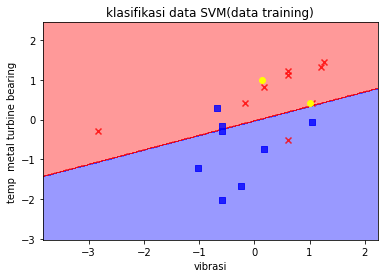

In [ ]:
plot_decision_regions(x_train_std, y_train, svm)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 1]
 [1 2]]
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



***HYPERPARAMETER TUNING***

In [ ]:
!pip install pyswarms
import pyswarms as ps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 8.0 MB/s 


NameError: ignored

In [ ]:
def svc2(x):
   model =SVC(C=abs(x[0]),gamma=abs(x[1]))
   model.fit(x_train,y_train)
   acc = (model.predict(x_test)==y.test).mean()
   inv_acc = 1/acc
   return inv_acc

In [ ]:
def s(x):
  n_particles = x.shape[0]
  j = [svc2(x[i]) for i in range(n_particles)]
  return np.array(j)

In [ ]:
# source https://github.com/vimalkumarmdb/A-novel-SVM-kNN-PSO-Ensemble-method-for-intrusion-detection-system-/blob/master/Soft_Computing_project.ipynb

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
#from pyswarms.utils.environments import PlotEnvironment
%load_ext autoreload
%autoreload 2
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=x_test_std.shape[0],dimensions=x_test_std.shape[1], options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2022-06-18 02:02:40,971 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.29e-40
2022-06-18 02:02:46,088 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2888585676327432e-40, best pos: [ 1.26975474e-21 -1.12815593e-20]


In [ ]:
acc_svm=1/cost
print(acc_svm)

7.758803216373911e+39


In [ ]:
# Inisialisasi swarm
options = {'c1':0.5, 'c2': 0.3, 'w':0.9}

# menggunakan fungsi PSO
dimensions = 2
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions, options=options)

# optimisasi
cost, pos = optimizer.optimize(s, iters=10)

2022-06-18 01:55:41,170 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/10


AttributeError: ignored

**PENGUJIAN DENGAN DATA THRUST BEARING**

In [ ]:
#mengimport dataset digunakan based classification
predikat = pd.read_excel("Data thrust bearing TA.xlsx")
predikat

,WAKTU,TEMP METAL THRUST,VIBRASI METAL THRUST,LABEL
0,2018-01-05 00:00:00,54.0,134.2,1.0
1,2018-01-17 00:00:00,54.3,130.0,1.0
2,2018-02-18 00:00:00,55.0,135.0,1.0
3,2018-04-02 00:00:00,56.0,135.0,1.0
4,2018-04-14 00:00:00,57.2,140.0,1.0
5,4-Mei-18,55.3,128.0,1.0
6,2018-06-12 00:00:00,57.4,136.0,1.0
7,2018-07-18 00:00:00,55.4,137.0,1.0
8,6-Agu-18,55.6,134.0,1.0
9,20-Okt-18,56.8,132.4,1.0


In [ ]:
#membagi column yang digunakan sebagai feature=x(Genshaftx,TEMPBEARING METAL) dan y=label(kondisi)
#y=label(1=kondisi abnormal,0=kondisi normal)
x = predikat.iloc[:,1:3].values
y = predikat.iloc[:,-1].values

In [ ]:
#membagi dataset sebagai modelling 80% untuk train dan 20% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Menskalakan data Thrust bearing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(x_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_test_std, y_test)))

The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


In [ ]:
# Menskalakan data thrust bearing tahun 2022
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[53.5, 127.5],
				[55.3, 122.8],
				[53.6, 125.8],
				[53.3, 119.3],
				[53.2, 123.7]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 53.5 127.5]
 [ 55.3 122.8]
 [ 53.6 125.8]
 [ 53.3 119.3]
 [ 53.2 123.7]]
[[0.14285714 1.        ]
 [1.         0.42682927]
 [0.19047619 0.79268293]
 [0.04761905 0.        ]
 [0.         0.53658537]]


In [ ]:
#hasil prediksi  normal data thrust bearing tahun 2022
import numpy as np
x3 = np.array([1. ,0.14285714 ])
y3 = np.array([0.42682927,1.   ])

***HASIL VISUALISASI MATPLOTLIB DATA THRUST BEARING***

In [ ]:
# Menvisualisasikan hasil pengujian data thrust bearing
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    plt.scatter(x3,y3, label=cl,color='yellow')


    plt.title('klasifikasi data SVM(data training)')
    plt.xlabel('vibrasi')
    plt.ylabel('temp  metal thrust bearing')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


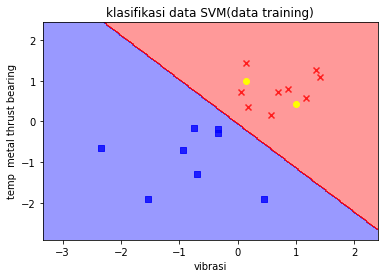

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plot_decision_regions(x_train_std, y_train, svm)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
#Hasil prediksi uji sampel data 1 vibrasi Genshaftx=127.5,TEMPBEARINGMETAL=53
y_pred=svclassifier.predict([(53.5,127.5)])
print(y_pred)
if (y_pred> 0):
  print('abnormal')
else:
  print('normal')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))